In [1]:

#import matplotlib as plt
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sb
import random
import sklearn
import pyclustertend
import matplotlib.cm as cm

#from sklearn.tree import convert_to_graphviz
import graphviz


%matplotlib inline

In [2]:
data = pd.read_csv('data/train.csv')

file = open('data/cualitativas.txt', 'r')
cualitativas = file.read().splitlines()
file = open('data/cuantitativas.txt', 'r')
cuantitativas = file.read().splitlines()

# Variables cualitativas
cualitativas = data[cualitativas]

# # Variables cuantitativas
cuantitativas = data[cuantitativas]

# Objetivo: Predecir los precios de las casas

## Analisis exploratorio

In [3]:

cuantitativas.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


LotFrontage : 
	Kurtosis: 17.375300497599614 
	Asimetría: 2.160865994705543 

LotArea : 
	Kurtosis: 202.5437927513529 
	Asimetría: 12.195142125084478 

YearBuilt : 
	Kurtosis: -0.44215484565294716 
	Asimetría: -0.612830724202899 

YearRemodAdd : 
	Kurtosis: -1.2719991404772555 
	Asimetría: -0.5030444967597948 

MasVnrArea : 
	Kurtosis: 10.04360232122905 
	Asimetría: 2.6663261001607435 

BsmtFinSF1 : 
	Kurtosis: 11.076089857631942 
	Asimetría: 1.6837708962341815 

BsmtFinSF2 : 
	Kurtosis: 20.04041549471293 
	Asimetría: 4.250888017057445 

BsmtUnfSF : 
	Kurtosis: 0.4692620789683075 
	Asimetría: 0.9193227015582005 

TotalBsmtSF : 
	Kurtosis: 13.201041630635025 
	Asimetría: 1.522688086978629 

1stFlrSF : 
	Kurtosis: 5.722076026587489 
	Asimetría: 1.3753417421837937 

2ndFlrSF : 
	Kurtosis: -0.5556767272864769 
	Asimetría: 0.8121942731961613 

LowQualFinSF : 
	Kurtosis: 82.945932358931 
	Asimetría: 9.002080417658552 

GrLivArea : 
	Kurtosis: 4.874265760253215 
	Asimetría: 1.365155954773434 

C:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


GarageCars : 
	Kurtosis: 0.2161348715110729 
	Asimetría: -0.34219689543081294 

GarageArea : 
	Kurtosis: 0.9098227950882034 
	Asimetría: 0.1797959420587727 

WoodDeckSF : 
	Kurtosis: 2.978604140391349 
	Asimetría: 1.5397916998042025 

OpenPorchSF : 
	Kurtosis: 8.457180405184337 
	Asimetría: 2.361911928568972 

EnclosedPorch : 
	Kurtosis: 10.39097160371135 
	Asimetría: 3.086696471376678 

3SsnPorch : 
	Kurtosis: 123.23517727268867 
	Asimetría: 10.293752357165413 

ScreenPorch : 
	Kurtosis: 18.371874098863685 
	Asimetría: 4.1179773827954875 

PoolArea : 
	Kurtosis: 222.500506832132 
	Asimetría: 14.813134660429398 

MiscVal : 
	Kurtosis: 698.6008400387273 
	Asimetría: 24.4516396173223 

MoSold : 
	Kurtosis: -0.40683350802995655 
	Asimetría: 0.2118350601903434 

YrSold : 
	Kurtosis: -1.1906338560829521 
	Asimetría: 0.096169579618143 



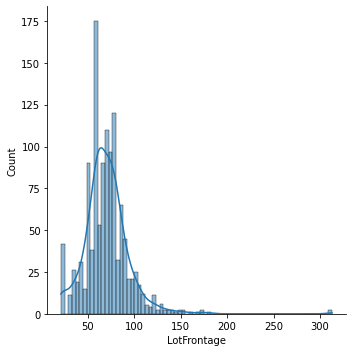

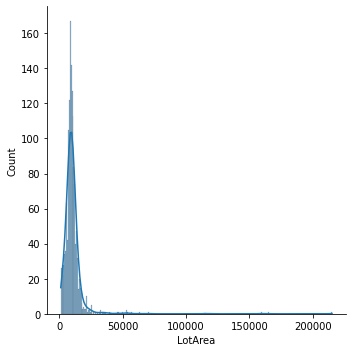

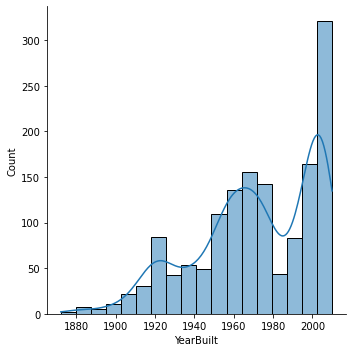

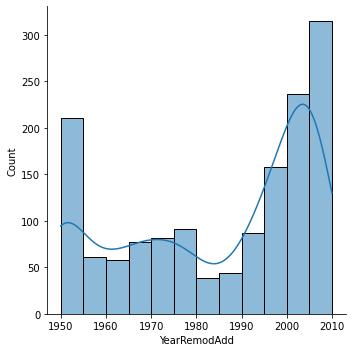

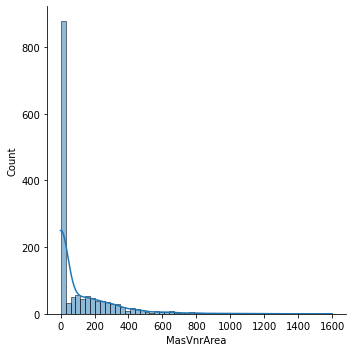

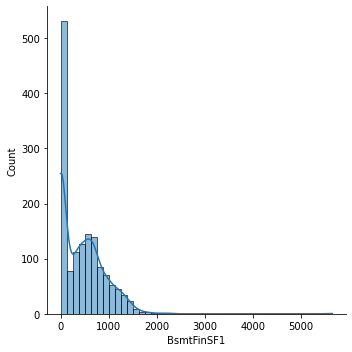

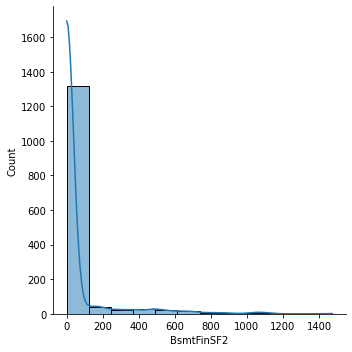

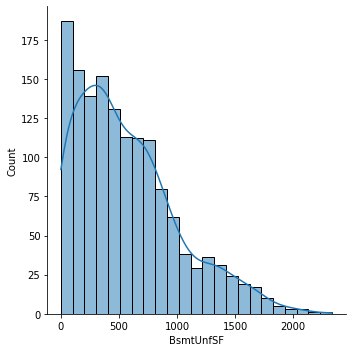

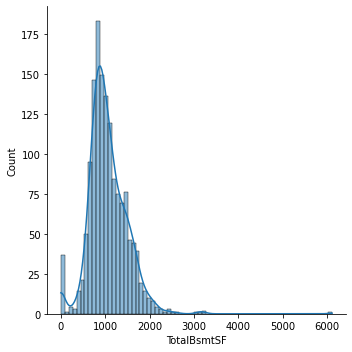

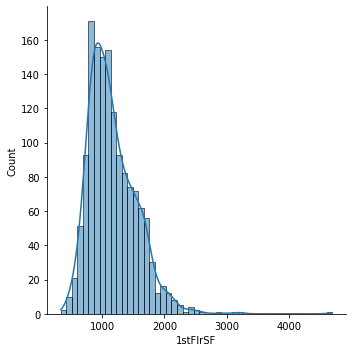

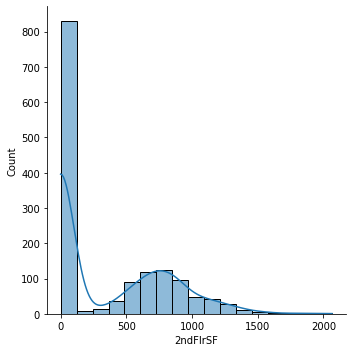

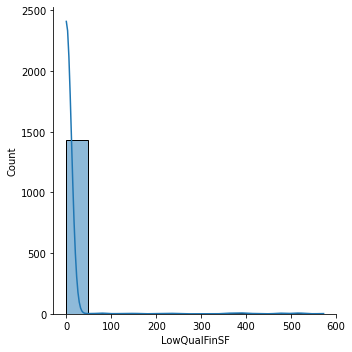

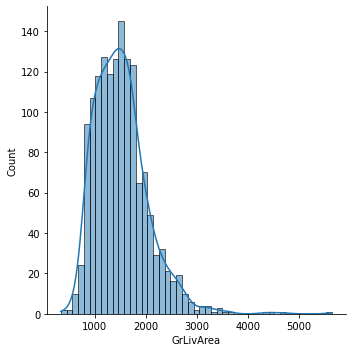

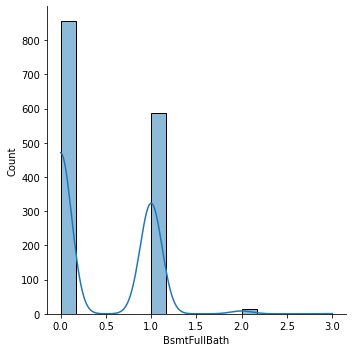

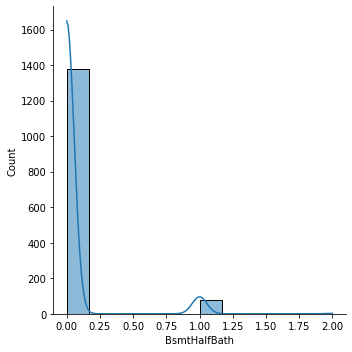

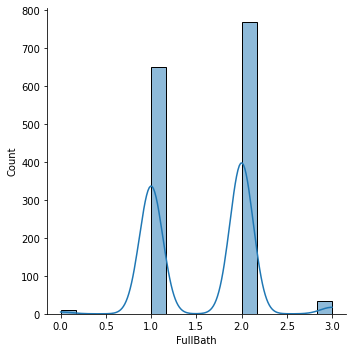

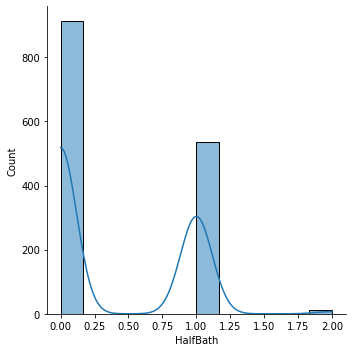

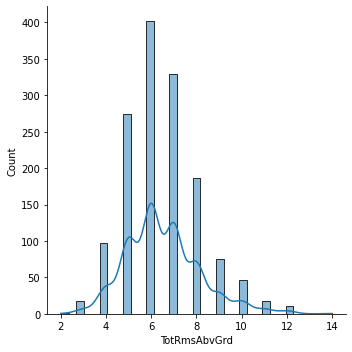

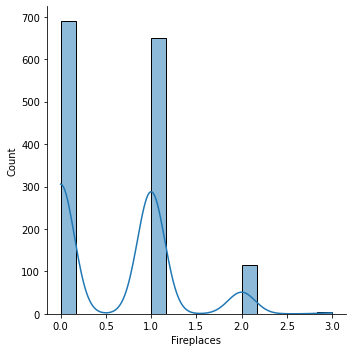

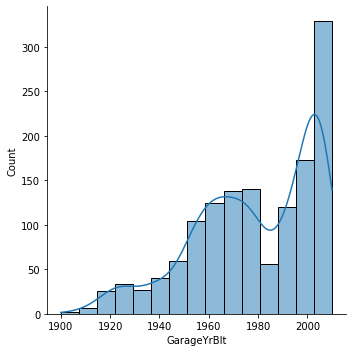

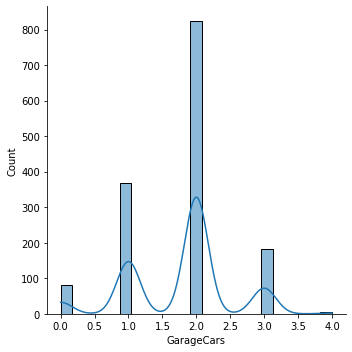

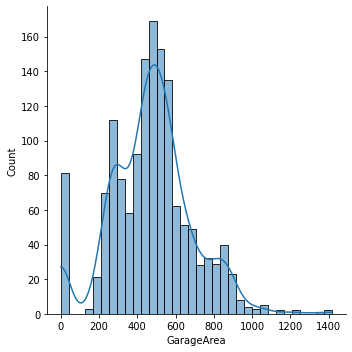

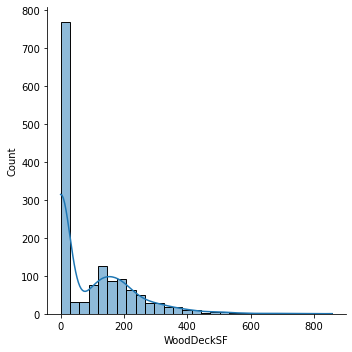

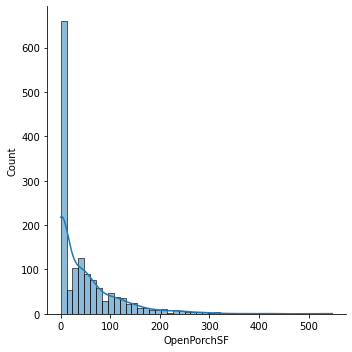

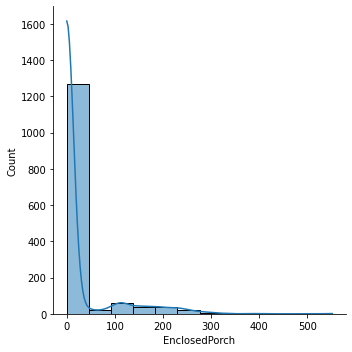

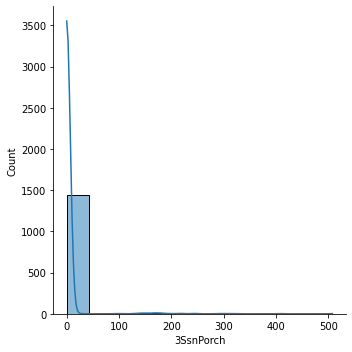

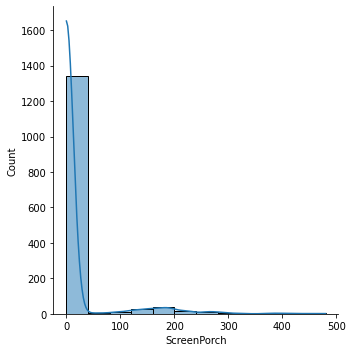

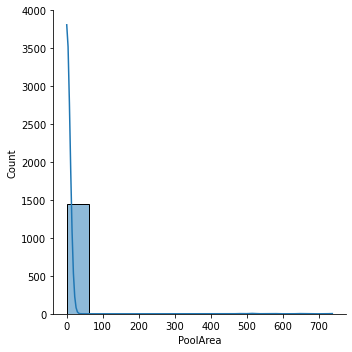

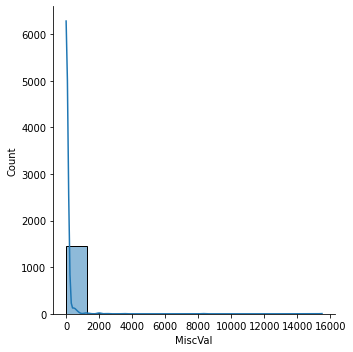

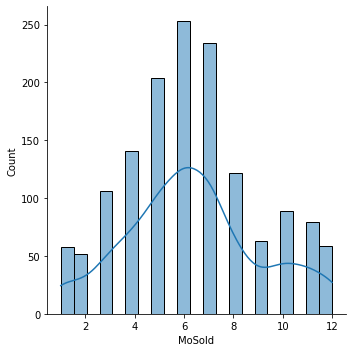

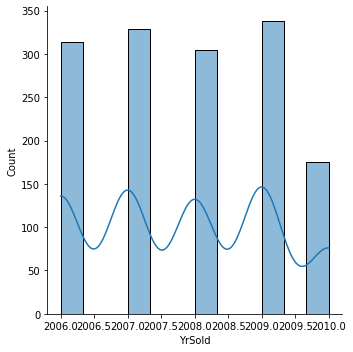

In [44]:
# plot value counts of all cualitative variables

for n in cuantitativas.columns:
    localData = cuantitativas[n].dropna(how='all', axis=0)
  
    sb.displot(localData, kde=True)

    print( n, ':', '\n\tKurtosis:', stats.kurtosis(localData), '\n\tAsimetría:', stats.skew(localData), '\n')

# cuantitativas.value_counts().dropna().plot(kind='bar', title='video')

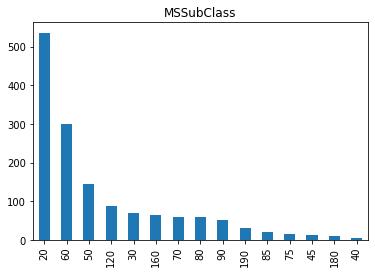

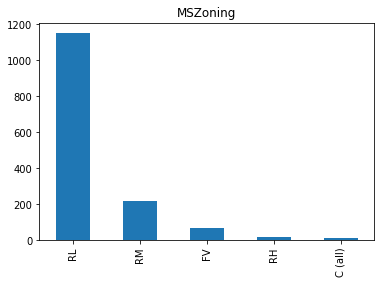

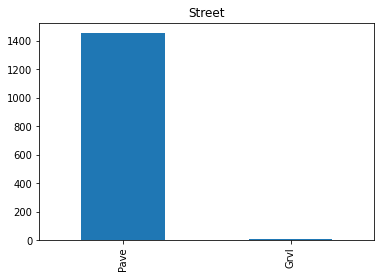

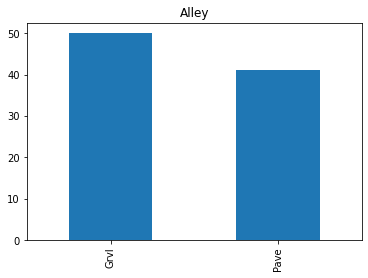

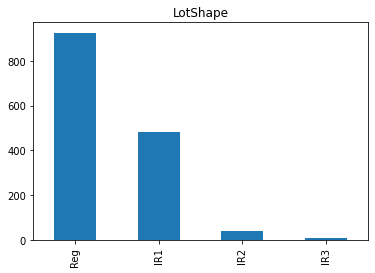

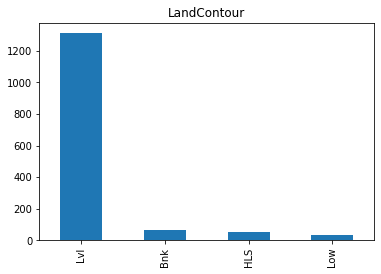

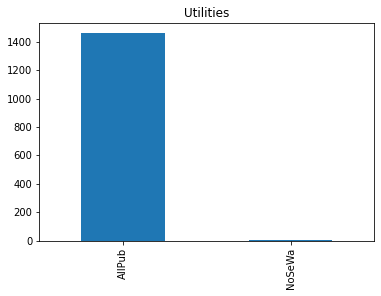

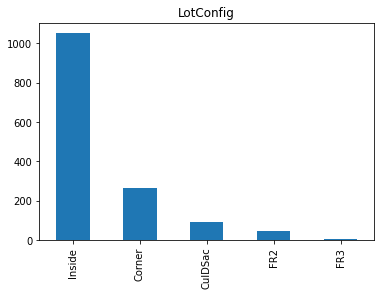

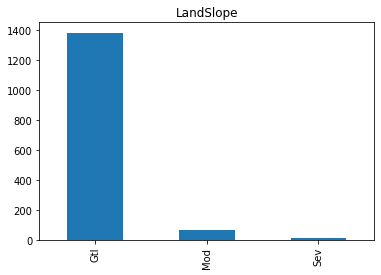

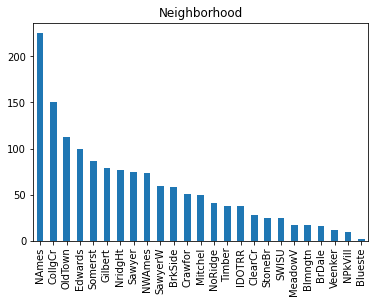

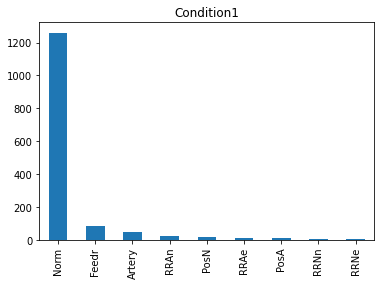

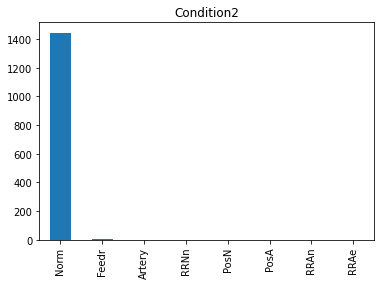

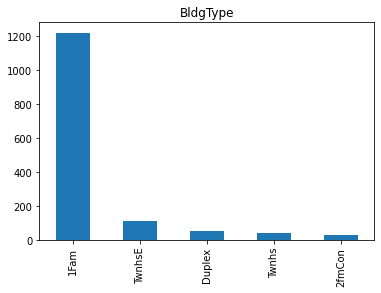

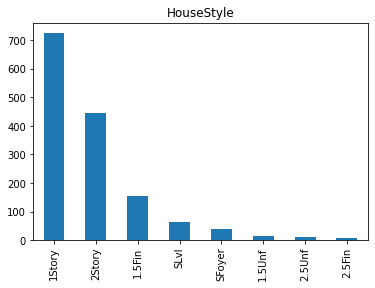

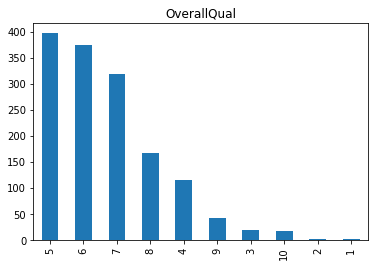

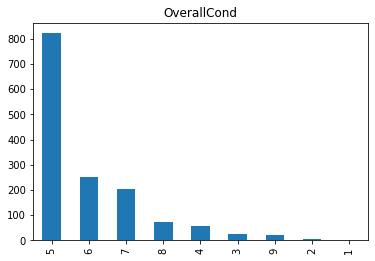

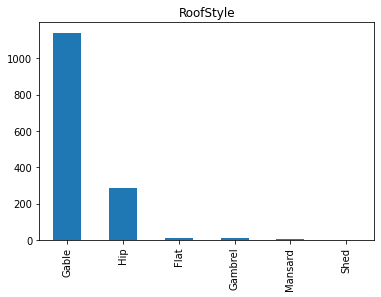

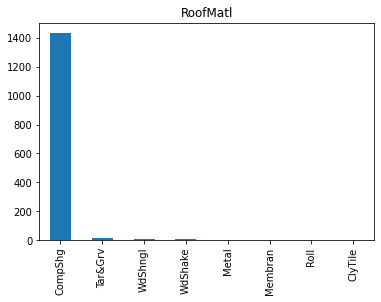

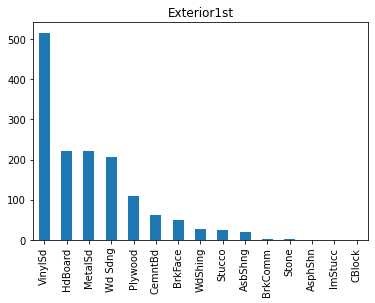

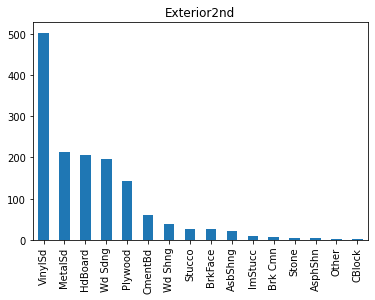

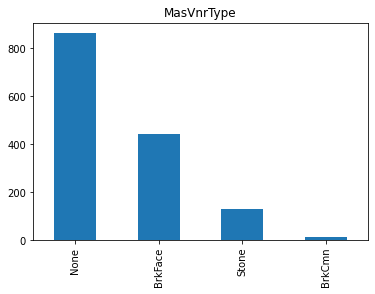

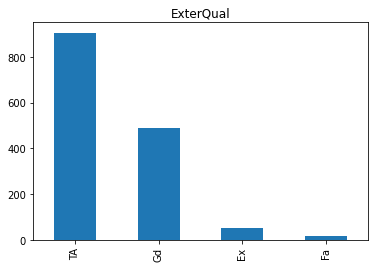

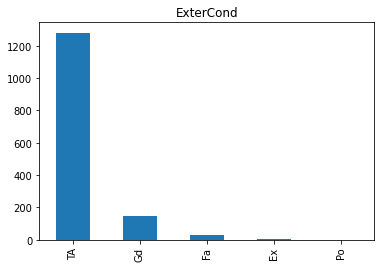

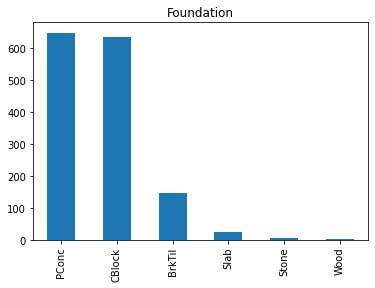

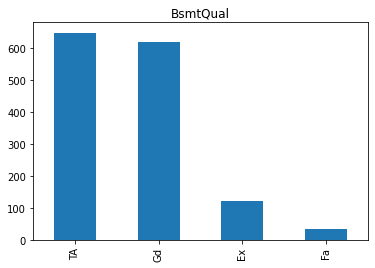

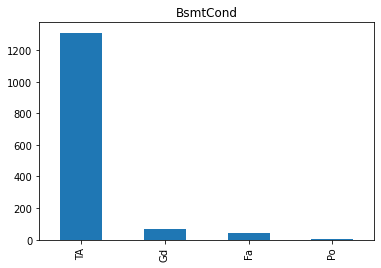

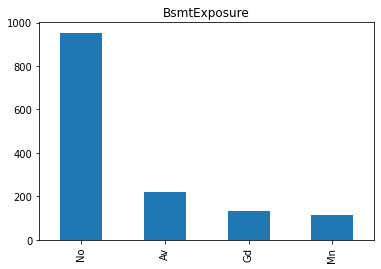

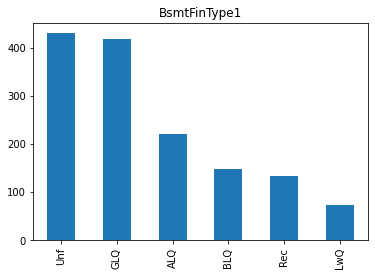

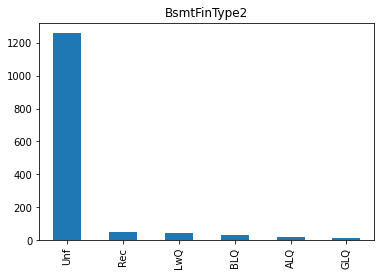

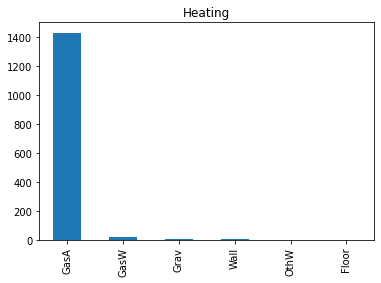

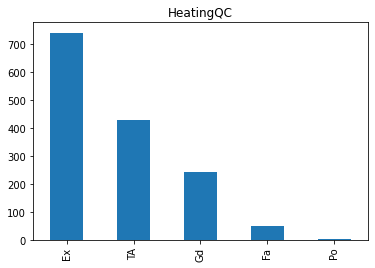

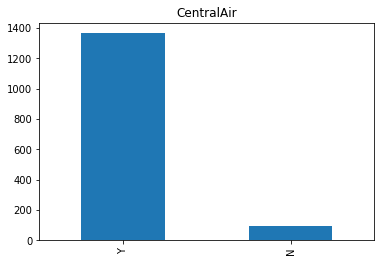

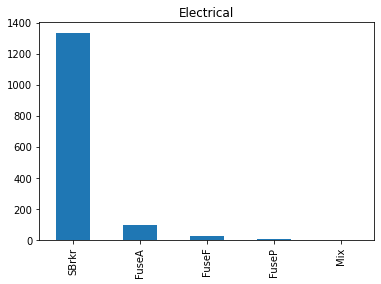

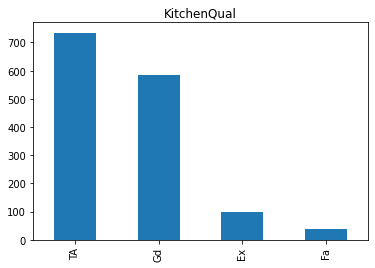

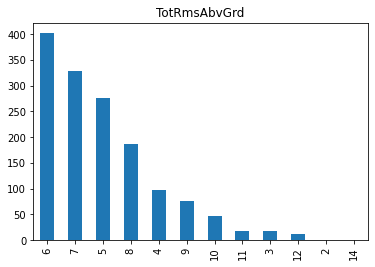

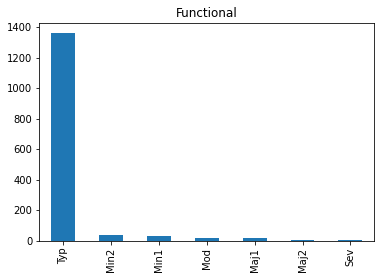

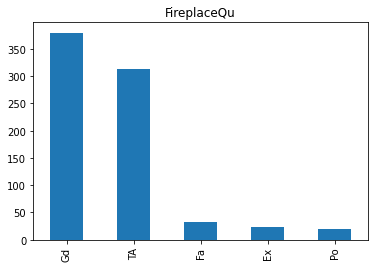

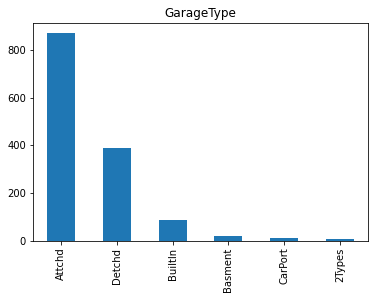

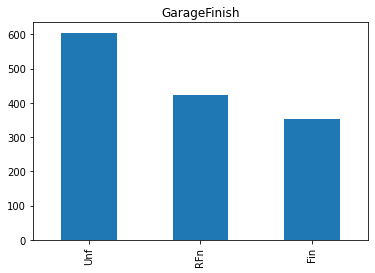

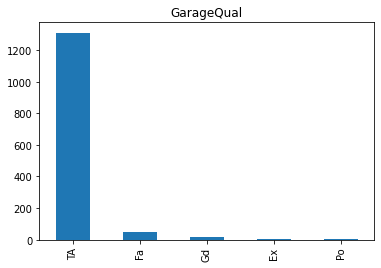

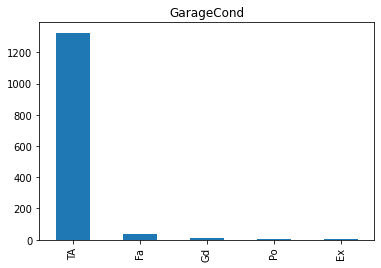

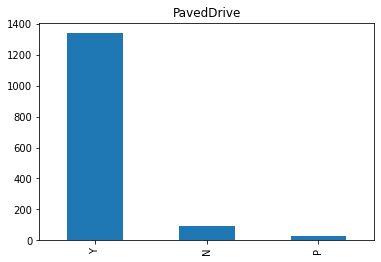

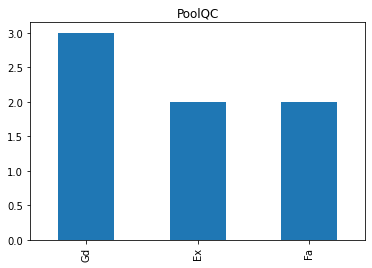

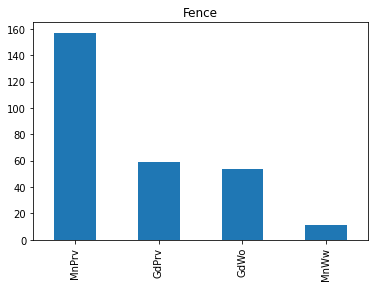

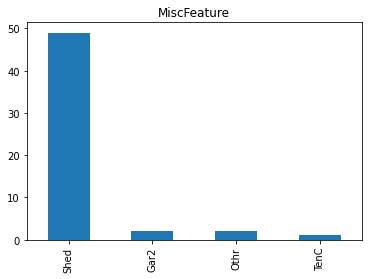

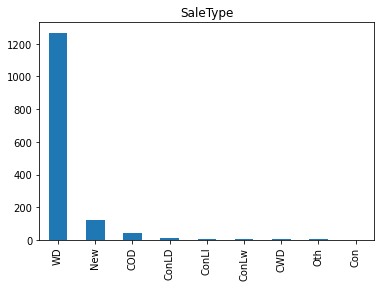

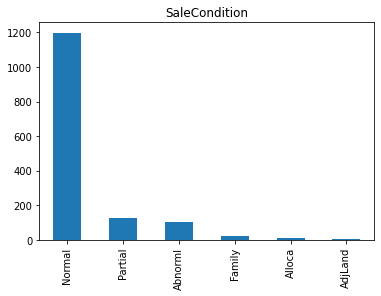

In [52]:
for n in cualitativas.columns:
    localData = cualitativas[n].dropna(how='all', axis=0)

    localData.value_counts().plot(kind='bar', title=n)
    plt.show()





In [28]:
data = pd.read_csv('data/train.csv').drop(['Id'], axis = 1)




,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,2,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,2,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,1,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,1,240,366,0,112,0,0,0,0,142125


In [32]:
CUANTITATIVES = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


#NON_CATEGORICAL = ['LotFrontage', 'LotArea','MoSold', 'YrSold', 'SalePrice']

NON_CATEGORICAL = ['LotFrontage', 'LotArea','PoolArea', 'OverallQual', 'OverallCond','GarageArea', 'SalePrice']

#### Creamos 2 categorias, una será para los algoritmos de aprendizaje y otra para el clustering, esto debido a que se encuentran muchas variables que están correlacionadas entre sí, lo cual alteraría el clustering, además se puede observar que hay variables categórigas representadas con numéricas, esto si nos puede servir en el arbol de desición, pero en el clustering alteraría los resultados

In [34]:


data[CUANTITATIVES]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,OverallQual,OverallCond,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,7,5,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,6,8,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,7,5,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,7,5,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,8,5,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,6,5,0,953,953,953,...,2,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,6,6,163,589,1542,2073,...,2,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,7,9,0,877,1152,1188,...,1,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,5,6,1029,0,1078,1078,...,1,240,366,0,112,0,0,0,0,142125


## Analisis exploratorio

In [35]:
cleanData = data.dropna()

#show data variables types
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cleanData.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


## Análisis de grupos


### Test del codo


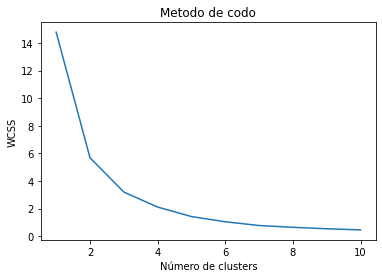

In [36]:
# Make sure that all the values inside data[NON_CATEGORICAL] are nume
numData = np.array(data[NON_CATEGORICAL].dropna().apply(pd.to_numeric))
numData_scaled = sklearn.preprocessing.scale(data[NON_CATEGORICAL])


variables_norm = (numData - numData.min()) / (numData.max() - numData.min())
variables_norm

# busqueda de la cantidad optima de clusters con el metodo de codo
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(variables_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metodo de codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

### Análisis con el test de la Silueta


Para:  2 Clusters  La cantidad promedio de la silueta es : 0.6410895009280395
Para:  3 Clusters  La cantidad promedio de la silueta es : 0.562573190230196
Para:  4 Clusters  La cantidad promedio de la silueta es : 0.5336282722645348
Para:  5 Clusters  La cantidad promedio de la silueta es : 0.5194244516129706
Para:  6 Clusters  La cantidad promedio de la silueta es : 0.5244298306547742


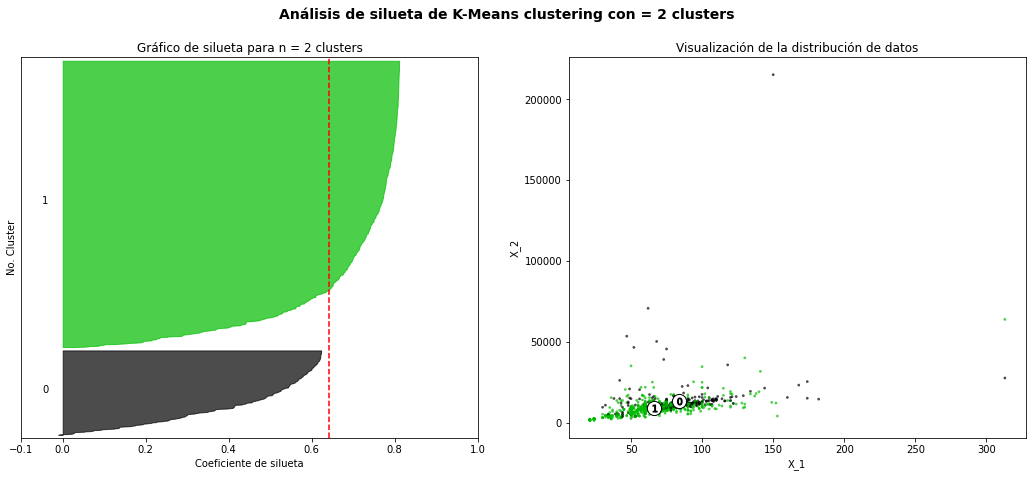

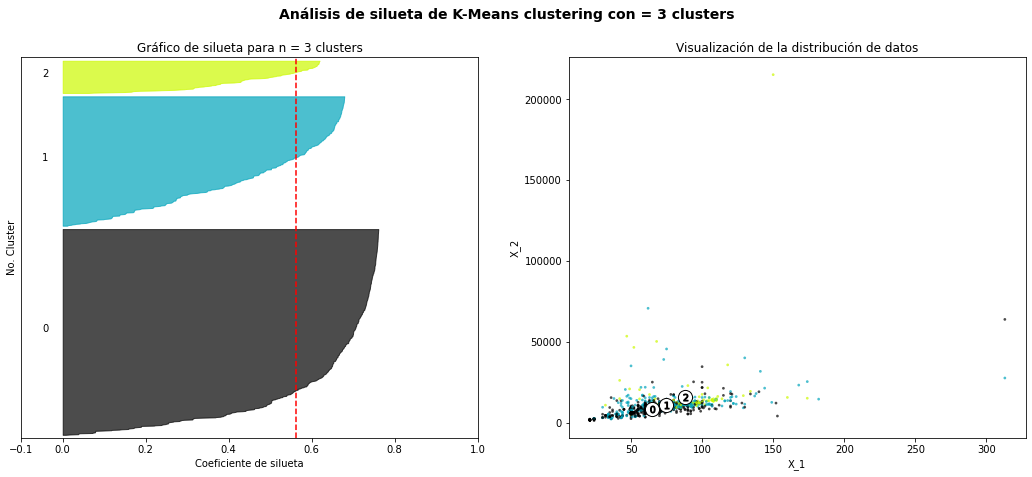

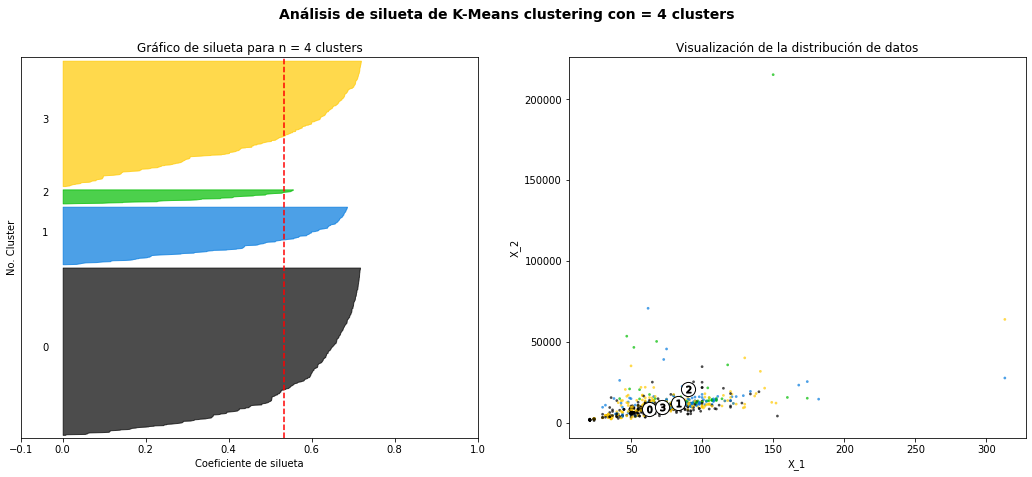

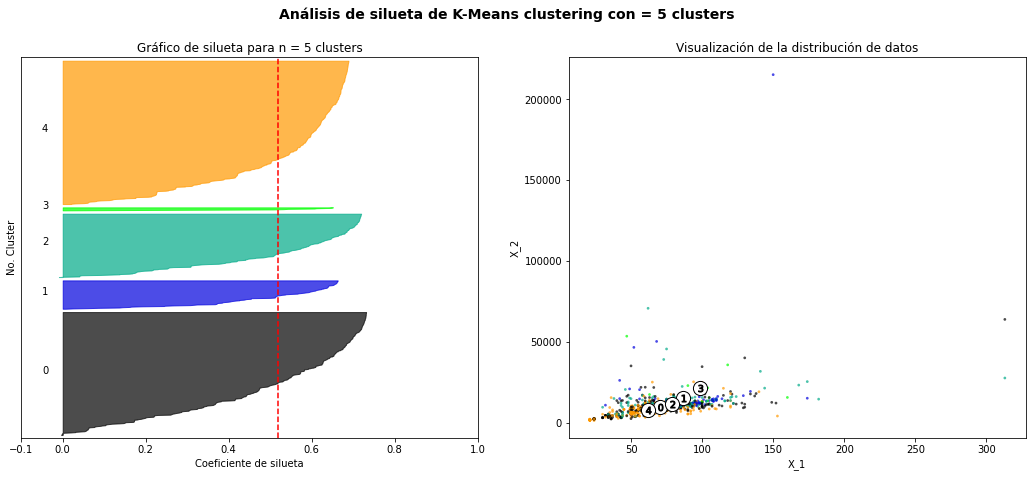

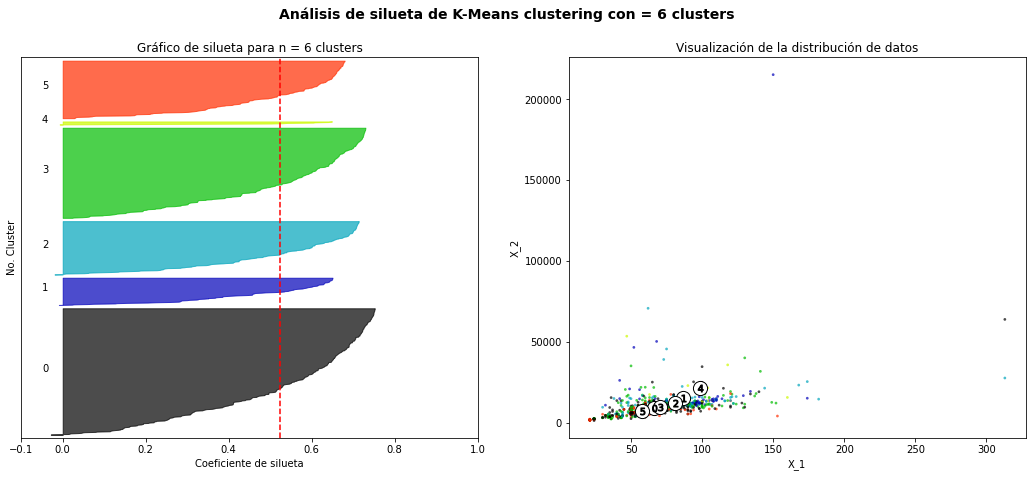

In [37]:
# Basado en el ejemplo de calculo de silueta visto en clase

range_n_clusters = [2, 3, 4, 5, 6]

# Loop sobre los distintos valores de n_clusters
for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(numData) + (n_clusters + 1) * 10])

    # El (n_clusters+1)*10 es para el espacio en blanco entre las siluetas
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(numData)

    # El silhouette_score calcula la calidad de agrupamiento promedio de la silueta
    silhouette_avg = silhouette_score(numData, cluster_labels)
    print(
        "Para: ",
        n_clusters,
        "Clusters  La cantidad promedio de la silueta es :",
        silhouette_avg,
    )

    # El silhouette_samples calcula la calidad de agrupamiento de cada punto
    sample_silhouette_values = silhouette_samples(numData, cluster_labels)

    y_lower = 10

    # Loop sobre los grupos
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        # El primer valor es el más bajo
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Color de la silueta
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Dibuja la silueta
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Dibuja el nombre del grupo
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10

    ax1.set_title("Gráfico de silueta para n = {} clusters".format(n_clusters))
    ax1.set_xlabel("Coeficiente de silueta")
    ax1.set_ylabel("No. Cluster")


    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) 

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        numData[:, 0], numData[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Dibuja el centroide de cada grupo
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):

        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")



    ax2.set_title("Visualización de la distribución de datos")
    ax2.set_xlabel("X_1")
    ax2.set_ylabel("X_2")

    plt.suptitle(
        "Análisis de silueta de K-Means clustering con = %d clusters"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Como podemos observar en el análisis del codo, nos sugiere que hagamos un clustering con K-Means de 2 grupos, sin embargo, se observa que también puede haber un codo en el número 3 de clusters, por lo que se realizó el test de la silueta para verificar dichas observaciones. Por lo que al observar, la puntuación más alta de silueta es obtenida con 2 clusters, sin embargo también se obtiene un muy buen agrupamiento con 3 clusters con una puntuación de silueta de 0.56 y teniendo únicamente valores individuales de silueta positivos. Por lo que para basarnos en la clasificación de las casas establecida podemos decir que sí es correcto la realización de 3 clusters. 

## Incorporación de los grupos al dataframe

In [38]:
# Datos con K means y sus respectivas clases.


full_data = data[CUANTITATIVES].dropna().apply(pd.to_numeric)
full_data = full_data.reset_index(drop=True)


cluster_data = data[CUANTITATIVES].dropna()[NON_CATEGORICAL].apply(pd.to_numeric)
cluster_data = cluster_data.reset_index(drop=True)

variables_norm = (cluster_data - cluster_data.min()) / (cluster_data.max() - cluster_data.min())
kmeans = KMeans(n_clusters = 3)


kmeans.fit(variables_norm)
Kmeans_cluster =pd.Series(kmeans.labels_)

cluster_data['cluster'] = Kmeans_cluster

full_data['cluster']  = cluster_data.cluster

full_data


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,OverallQual,OverallCond,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,cluster
0,65.0,8450,196.0,706,7,5,0,150,856,856,...,548,0,61,0,0,0,0,0,208500,1
1,80.0,9600,0.0,978,6,8,0,284,1262,1262,...,460,298,0,0,0,0,0,0,181500,2
2,68.0,11250,162.0,486,7,5,0,434,920,920,...,608,0,42,0,0,0,0,0,223500,1
3,60.0,9550,0.0,216,7,5,0,540,756,961,...,642,0,35,272,0,0,0,0,140000,1
4,84.0,14260,350.0,655,8,5,0,490,1145,1145,...,836,192,84,0,0,0,0,0,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,62.0,7917,0.0,0,6,5,0,953,953,953,...,460,0,40,0,0,0,0,0,175000,0
1191,85.0,13175,119.0,790,6,6,163,589,1542,2073,...,500,349,0,0,0,0,0,0,210000,0
1192,66.0,9042,0.0,275,7,9,0,877,1152,1188,...,252,0,60,0,0,0,0,2500,266500,2
1193,68.0,9717,0.0,49,5,6,1029,0,1078,1078,...,240,366,0,112,0,0,0,0,142125,0


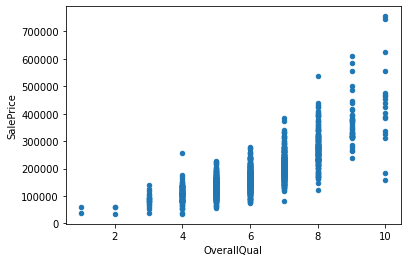

In [4]:
prueba4 = data[['OverallQual', 'SalePrice']]
prueba4.sort_values(by=['SalePrice'], ascending=False)
prueba4
grafica = prueba4.plot.scatter(x='OverallQual', y='SalePrice')


In [7]:
data.fillna(0)
precioMinimo = data['SalePrice'].min()
precioMaximo = data['SalePrice'].max()
calc = (precioMaximo - precioMinimo) / 3
data['PriceRange'] = data['LotArea']
data['PriceRange'][data['SalePrice'] < (precioMinimo + calc)] = 'Economicas'
data['PriceRange'][data['SalePrice'] >= (precioMinimo + calc)] = 'Intermédias'
data['PriceRange'][data['SalePrice'] >= (precioMinimo + (calc * 2))] = 'Caras'

C:\Users\Christian\AppData\Local\Temp\ipykernel_6644\2515185136.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRange'][data['SalePrice'] < (precioMinimo + calc)] = 'Economicas'
C:\Users\Christian\AppData\Local\Temp\ipykernel_6644\2515185136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PriceRange'][data['SalePrice'] >= (precioMinimo + calc)] = 'Intermédias'
C:\Users\Christian\AppData\Local\Temp\ipykernel_6644\2515185136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [8]:
Y = data['PriceRange']
X = data.drop(['PriceRange'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)
y_train

25       Economicas
501      Economicas
965      Economicas
428      Economicas
192      Economicas
           ...     
353      Economicas
313     Intermédias
438      Economicas
1446     Economicas
991      Economicas
Name: PriceRange, Length: 1021, dtype: object